,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Column Name,Missing values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


,Column Name,Missing values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,0
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


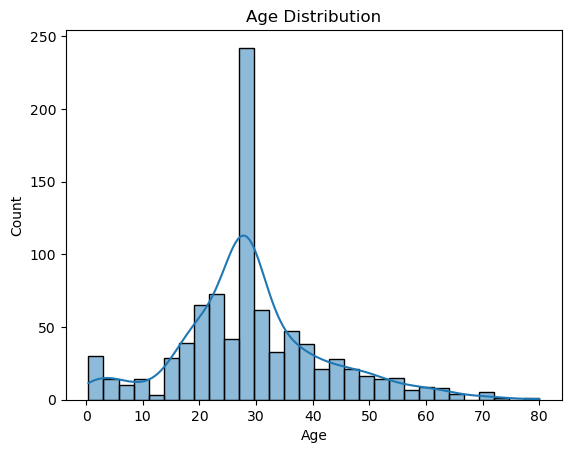

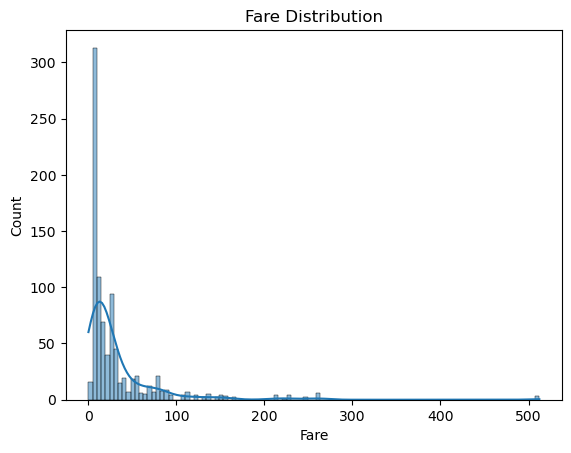

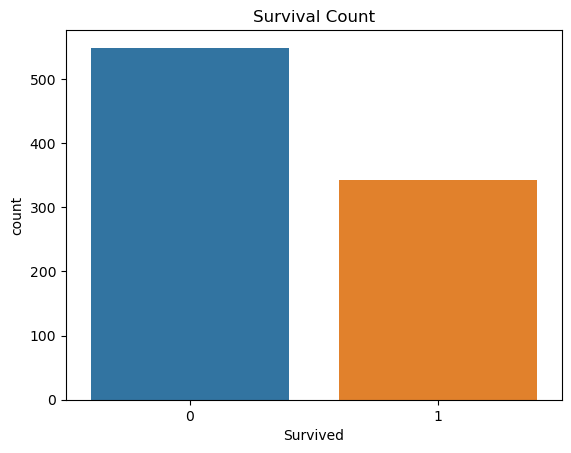

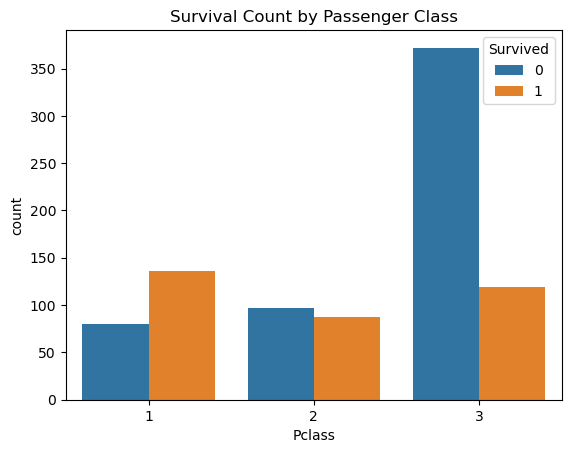

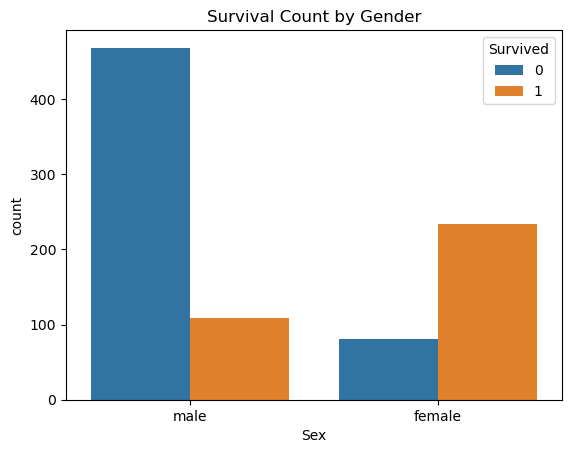

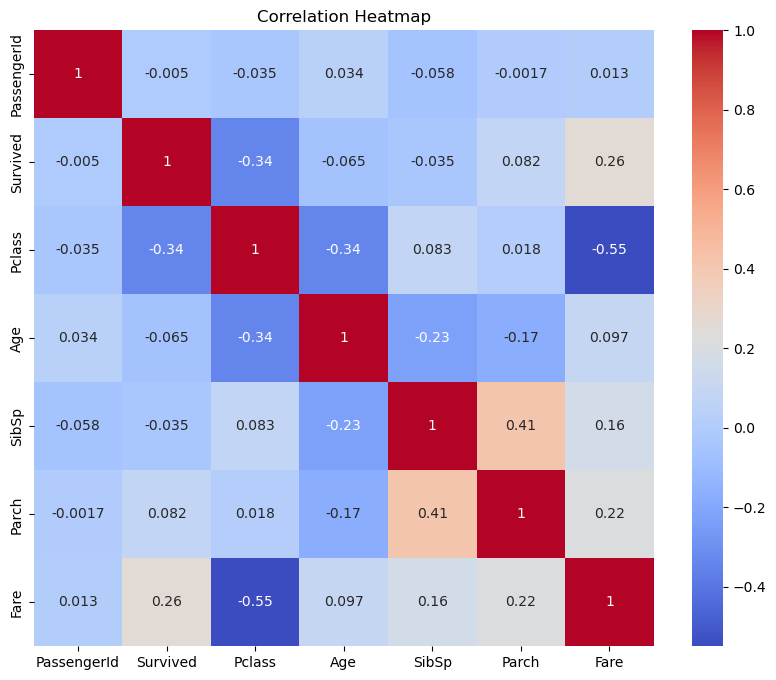

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load the dataset
titanic = pd.read_csv('train.csv')

# Display the first few rows of the dataset
html_text = "<h1>Sample Data from the Dataset</h1>"
display(HTML(html_text))
display(titanic.head())

# Data Cleaning
# Check for missing values
html_text = "<h1>Missing Values</h1>"
display(HTML(html_text))
missing_values = titanic.isnull().sum()

# Create a DataFrame for missing values
missing_df = pd.DataFrame({'Column Name': missing_values.index, 'Missing values': missing_values.values})
display(missing_df)

# Fill missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop(columns=['Cabin'], inplace=True)  # Dropping 'Cabin' due to too many missing values

# Verify that there are no more missing values
html_text = "<h1>Missing Values after cleaning</h1>"
display(HTML(html_text))
missing_values = titanic.isnull().sum()

# Create a DataFrame for missing values
missing_df = pd.DataFrame({'Column Name': missing_values.index, 'Missing values': missing_values.values})

display(missing_df)


# Exploratory Data Analysis (EDA)
# Summary statistics
html_text = "<h1>Descriptive Statistics</h1>"
display(HTML(html_text))
display(titanic.describe())
html_text = "<h1>Exploratory Data Analysis (EDA)</h1>"
display(HTML(html_text))
# Visualize the distribution of numerical features
sns.histplot(titanic['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(titanic['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Visualize the relationship between variables
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Gender')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
